In [1]:
#importing important modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data set

df = pd.read_csv("retail_sales_dataset.csv")
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.rename(columns={'Date': 'date'}, inplace=True)
df.head(5)

,Transaction ID,date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.isnull().sum()

Transaction ID      0
date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

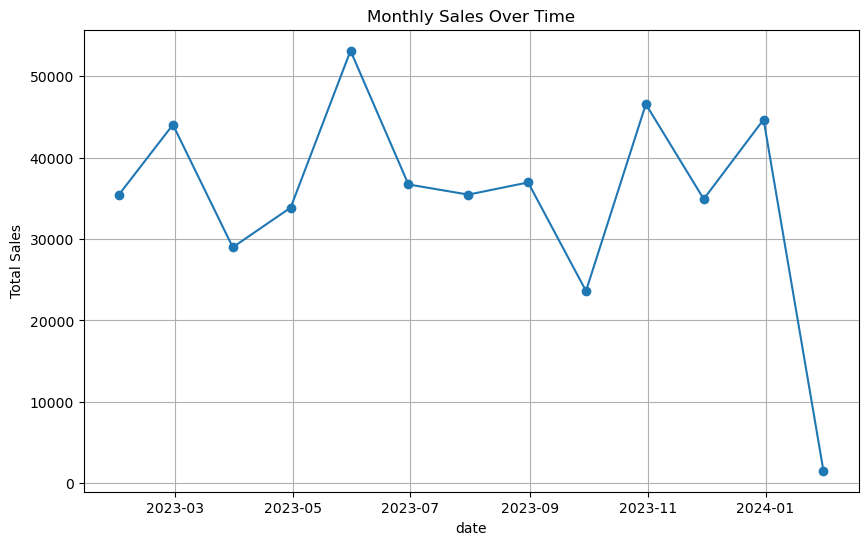

In [6]:
#Time Series Visualization 

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
monthly_sales = df['Total Amount'].resample('M').sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [7]:
#Which gender is Likely to spent more??
gender_consumption = df.groupby('Gender')['Total Amount'].sum()
print(gender_consumption)

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


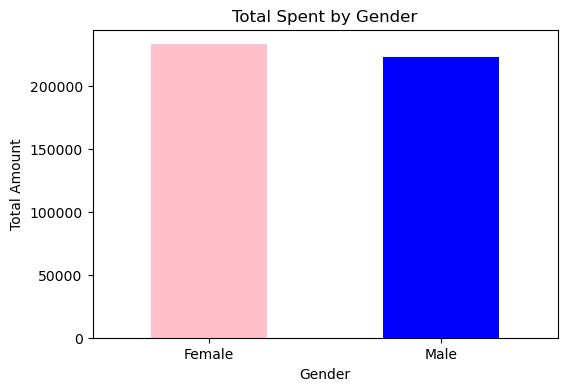

In [8]:
gender_consumption.plot(kind='bar', color=['pink', 'blue'], figsize=(6, 4))
plt.title('Total Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.xticks(rotation=0)
plt.show()

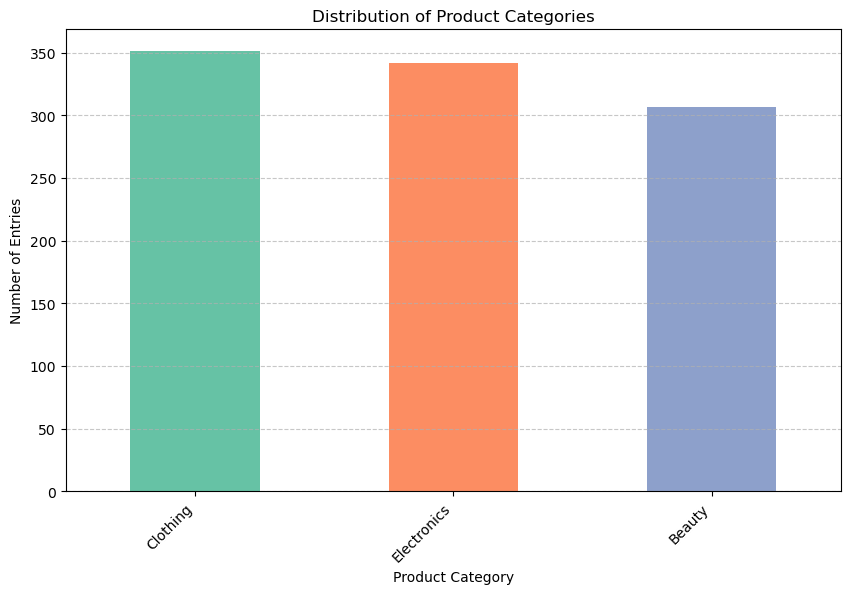

In [9]:
#Which Product has the most Selling??

category_counts = df['Product Category'].value_counts()
sns.set_palette('Set2')
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=sns.color_palette('Set2'))
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


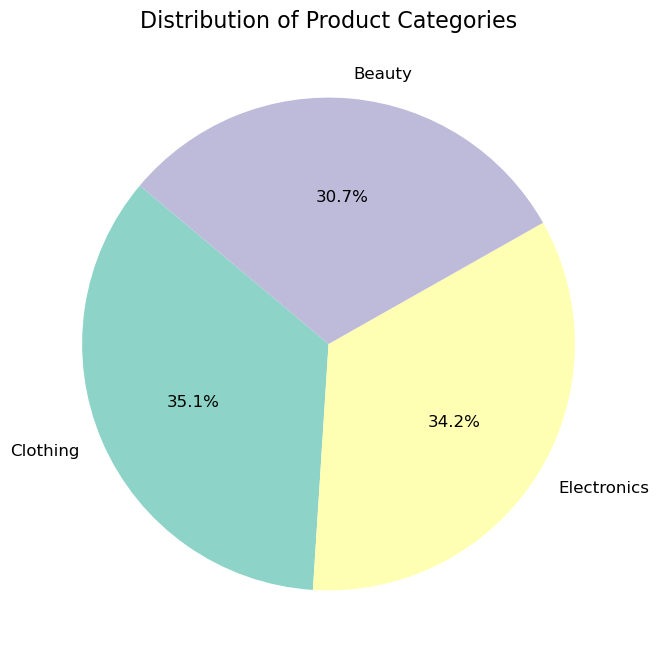

In [10]:
#Product Category Pie Chart 

category_counts = df['Product Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.Set3.colors, startangle=140, textprops={'fontsize': 12})
plt.title('Distribution of Product Categories', fontsize=16)
plt.show()

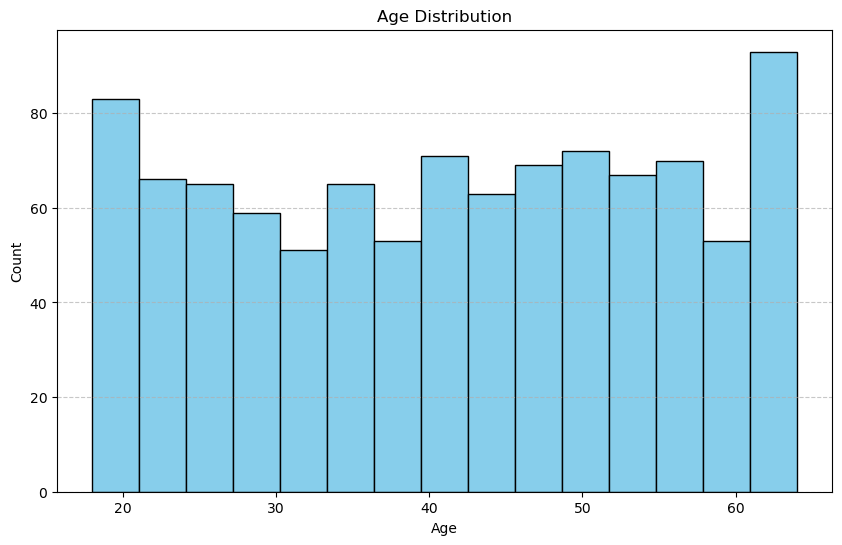

In [11]:
#Which age group Has the most potential customers??

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


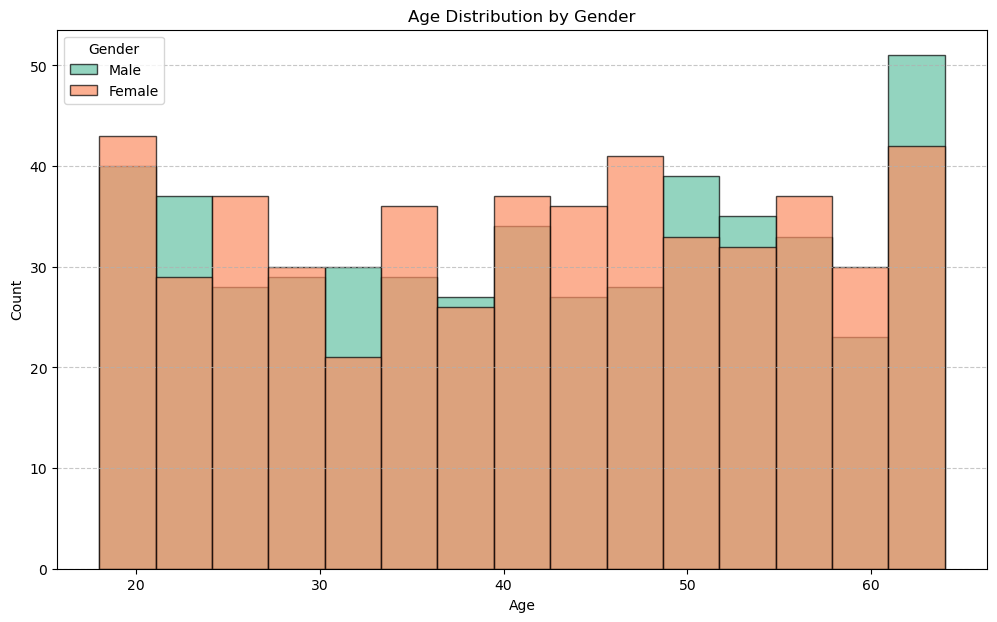

In [12]:
#which age group from which gender are the most potential customers????

plt.figure(figsize=(12, 7))
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    plt.hist(subset['Age'], bins=15, alpha=0.7, label=gender, edgecolor='black')
    plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()